## African Debt GDP Analysis by Anurag Aiyer and Jatin Sethi

## <u> Understanding World Bank API </u>

In [ ]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

Line below is one metric that World Bank API provides

In [ ]:
wb.series.metadata.get('DT.DOD.MWBG.CD')

field,value
Aggregationmethod,Sum
IndicatorName,"IBRD loans and IDA credits (DOD, current US$)"
License_Type,CC BY-4.0
License_URL,https://datacatalog.worldbank.org/public-licenses#cc-by
Longdefinition,IBRD loans and IDA credits are public and publicly guaranteed debt extended by the World Bank Group. The International Bank for Reconstruction and Development (IBRD) lends at market rates. Credits from the International Development Association (IDA) are at concessional rates. Data are in current U.S. dollars.
Periodicity,Annual
Source,"World Bank, International Debt Statistics."
Topic,Economic Policy & Debt: External debt: Debt outstanding


We see below that this is the way to combine multiple World Bank metrics into a dataframe

In [ ]:
#Education, Health, Transportation
combined = wb.data.DataFrame(['EG.ELC.ACCS.ZS', 'SP.POP.TOTL'], ['BRA', 'COL', 'PER'],
                             time=range(1990,1996), index=['series', 'economy'])


## <u>Exploratory Data Analysis</u>

In [ ]:
loanDataByCountry = pd.read_excel("LoanData_06April2021.xlsx", sheet_name=0)

/root/venv/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


A glance at the loan data for all the African nations. Figured are in millions of US $

In [ ]:
loanDataByCountry.head(10)

,All Type 1 Loans,Regional,Algeria,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Cape Verde,...,Tanzania,Togo,Tunisia,Uganda,Western Sahara,Zambia,Zimbabwe,Unnamed: 58,Yearly Sum,billions
0,2000,0.000,0.0,0.000000,8.879600,2.348640,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,2.889443,0.000000,0.0,0.000,7.490275,NaN,134.177310,0.134177
1,2001,0.000,0.0,0.000000,15.707123,14.948322,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,40.000000,0.0,0.000,0.000000,NaN,297.926972,0.297927
2,2002,0.000,9.0,151.040836,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,4.153688,0.000000,0.000000,0.000000,0.0,8.400,0.000000,NaN,734.936132,0.734936
3,2003,0.000,0.0,11.000000,0.000000,27.322620,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000,22.000000,NaN,1729.836945,1.729837
4,2004,0.000,0.0,435.118146,0.000000,28.031173,0.0,0.000000,3.624721,0.0,...,0.000000,20.378159,33.045369,0.000000,0.0,0.000,40.000000,NaN,928.338292,0.928338
5,2005,0.000,0.0,1042.702605,0.000000,22.304280,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,8.000,12.000000,NaN,2183.191393,2.183191
6,2006,92.393,0.0,705.000000,3.843641,8.250200,0.0,0.000000,5.124854,2.5,...,10.249709,19.700636,12.812136,0.000000,0.0,67.800,375.624271,NaN,5115.286754,5.115287
7,2007,0.000,0.0,2186.072758,0.000000,0.000000,0.0,0.000000,69.558414,0.0,...,0.000000,0.000000,2.877856,30.555974,0.0,39.899,0.000000,NaN,5459.147205,5.459147
8,2008,50.000,0.0,274.348681,0.000000,2.911700,0.0,2.197641,23.310287,15.7,...,76.917442,0.000000,0.000000,5.000000,0.0,315.600,20.500000,NaN,3991.766517,3.991767
9,2009,100.000,0.0,336.511470,0.000000,825.000000,0.0,7.323808,220.930469,0.0,...,0.000000,119.184413,80.148000,69.722647,0.0,180.220,0.000000,NaN,6447.549246,6.447549


### Top 5 Indebted African Nations

The top 5 nations that have received the most money from China are a good representation of the impact these loans can have on a country's development. Therefore, we're going to be using these countries for our analysis from this point on, specifically Angola.

In [ ]:
#Total loan money received from China 
sortedLoans = loanDataByCountry.transpose().reset_index()[2:58].sort_values(by=21, ascending=False) #Sum column is 21
top5Countries = list(sortedLoans.head(5)['index'])
sortedLoans = sortedLoans.rename(columns={21: "Total Loans(millions US$)"})
sortedLoans = sortedLoans.rename(columns={'index': 'Country'})
print(sortedLoans.head(5)[['Country', 'Total Loans(millions US$)']])


     Country Total Loans(millions US$)
3     Angola              42619.377871
20  Ethiopia              13729.229731
56    Zambia               9848.340115
27     Kenya               9175.216309
40   Nigeria               6731.725228


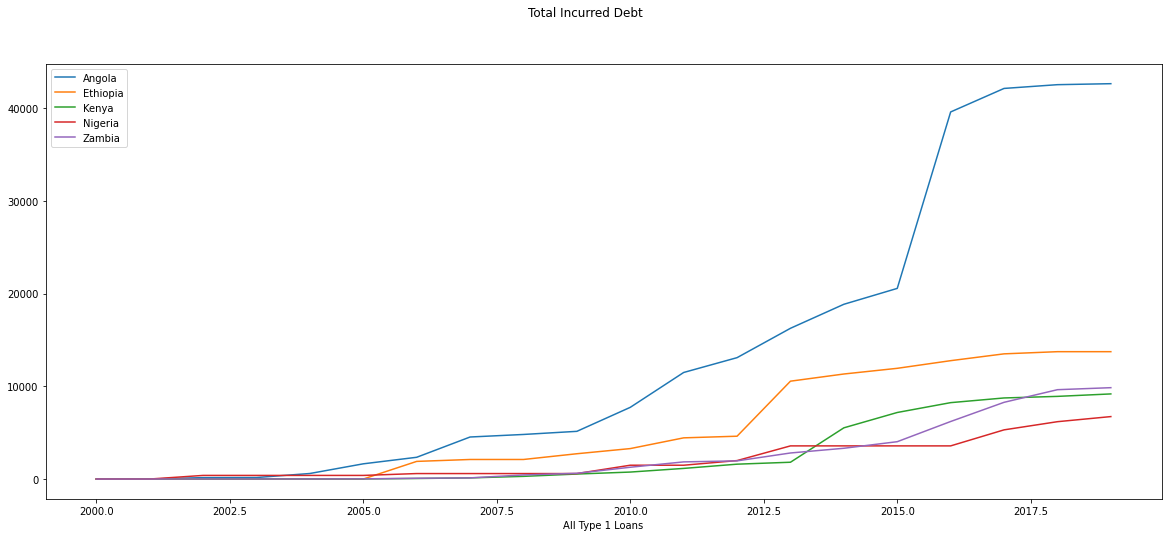

In [ ]:
HighestLoans = loanDataByCountry[top5Countries + ['All Type 1 Loans']][:20]
HighestLoans = HighestLoans.pivot_table(index=['All Type 1 Loans'], values=top5Countries)
HighestLoans = HighestLoans.cumsum()
HighestLoans = HighestLoans.rename(index={'All Type 1 Loans': 'Year'})
HighestLoans.plot(figsize=(20,8))
plt.suptitle("Total Incurred Debt")
plt.show()

This chart is a clear representation of the debt these African nations have incurred over the past 20 years. Angola is currently the leader with over $42 billion in loans from China allocated towards projects in all sectors of the economy. As it can be seen from the figure above the next four highest in-debt countries are currently way below Angola at under $15 billion but their loans have been consistently rising over the past 5 years, while Angola's loans have plateaued. It is clear that other nations are on a similar trajectory as Angola, making Angola a compelling case to study the impact of these loans.

Let's look at specific sector loans for these 5 countries to better visualize the trajectory they're following

### Loans in the Transportation Sector

In [ ]:
transportLoans = pd.read_excel("SectorLoansForHighlyIndebtedAfricanCountries.xlsx", sheet_name=0) #Transport Loans For Top Five Countries
transportLoans.head()

,YEAR,Loan Amount in USD (M),COUNTRY,LENDER,PURPOSE
0,2004,12,Angola,Eximbank,Road Transport Support
1,2005,191,Angola,Eximbank,"Kifangondo-Caxito-Uíge-Negage Road, 371 km"
2,2007,429,Angola,Eximbank,"Caxito-Nzeto Road Rehabilitation, 208km (Disbu..."
3,2007,144,Angola,Eximbank,Nzeto-Tomboco-Mbanza Congo Road Rehabilitation...
4,2007,57,Angola,Eximbank,"Cars Purchase - 1500 Units, Phase II"


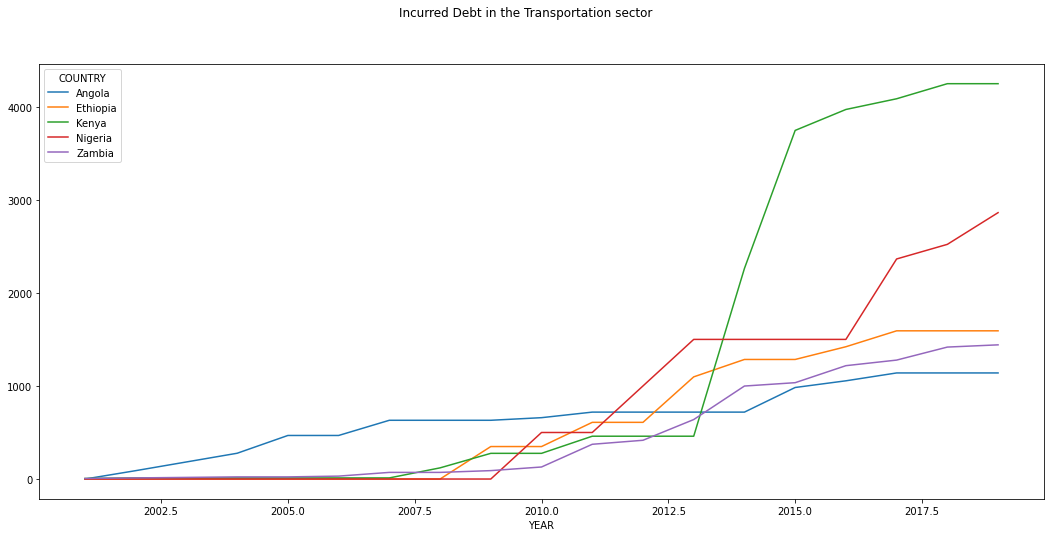

In [ ]:
transportLoansChart = transportLoans[['COUNTRY','Loan Amount in USD (M)', 'YEAR']]

transportLoansChart = transportLoansChart.pivot_table(index='YEAR', columns='COUNTRY', values = 'Loan Amount in USD (M)')
transportLoansChart = transportLoansChart.fillna(0).cumsum()
transportLoansChart.plot(figsize=(18,8))
plt.suptitle("Incurred Debt in the Transportation sector")
plt.show()

### Loans in the Agriculture Sector

In [ ]:
agricultureLoans = pd.read_excel("SectorLoansForHighlyIndebtedAfricanCountries.xlsx", sheet_name=1) #Agriculture Loans For Top Five Countries
agricultureLoans.head()

,YEAR,Loan Amount in USD (M),COUNTRY,LENDER,SECTOR,PURPOSE
0,2004,20,Angola,Eximbank,Agriculture,"Agricultural Equipment, Machinery and Tools Pu..."
1,2005,29,Angola,Eximbank,Agriculture,Agricultural Equipment for MECANAGRO Purchase
2,2005,86,Angola,Eximbank,Agriculture,"Luena, Caxito, Gangelas, Waco-Kungo Irrigation..."
3,2006,88,Angola,Eximbank,Agriculture,30m Boats - 25 Units; 4.15m Canoes - 1000 Units
4,2006,88,Angola,Eximbank,Agriculture,46.9m Patrol Boats - 5 Units; 33.88m Shrimp Bo...


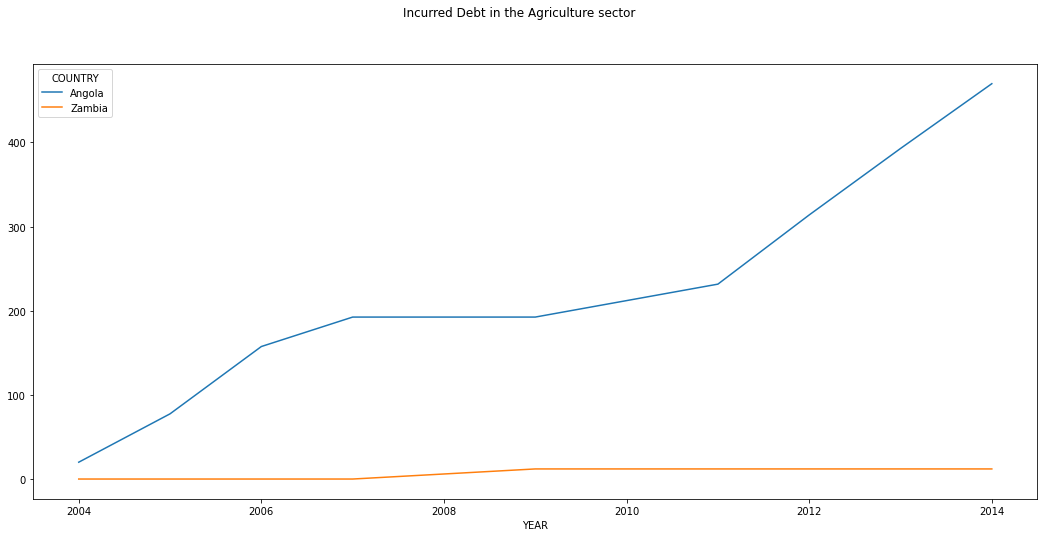

In [ ]:
agricultureLoansChart = agricultureLoans[['COUNTRY','Loan Amount in USD (M)', 'YEAR']]
agricultureLoansChart = agricultureLoansChart.pivot_table(index='YEAR', columns='COUNTRY', values = 'Loan Amount in USD (M)')
agricultureLoansChart = agricultureLoansChart.fillna(0).cumsum()
agricultureLoansChart.plot(figsize=(18,8))
plt.suptitle("Incurred Debt in the Agriculture sector")
plt.show()

We do not see the other 3 countries in this chart due to a lack of data but our research shows high inflow of money into the agriculture sector of those countries in the past 2-3 years. Angola however has not taken anymore agricultural loans since the end of 2013

### Loans in the Water Sector

In [ ]:
WaterLoans = pd.read_excel("SectorLoansForHighlyIndebtedAfricanCountries.xlsx", sheet_name=2) #Water Loans For Top Five Countries
WaterLoans.head()

,YEAR,Loan Amount in USD (M),COUNTRY,LENDER,SECTOR,PURPOSE
0,2005,40,Angola,Eximbank,Water,Luanda's Water Supply System
1,2005,20,Angola,Eximbank,Water,Huambo's Water Supply System
2,2005,19,Angola,Eximbank,Water,"Caxito, Catete and Uíge's Water Supply System"
3,2008,32,Angola,Eximbank,Water,"Lundas Sul and Norte, Dundo and Saurimo Water ..."
4,2007,83,Angola,Eximbank,Water,"Luanda's Water Supply System, Package 4"


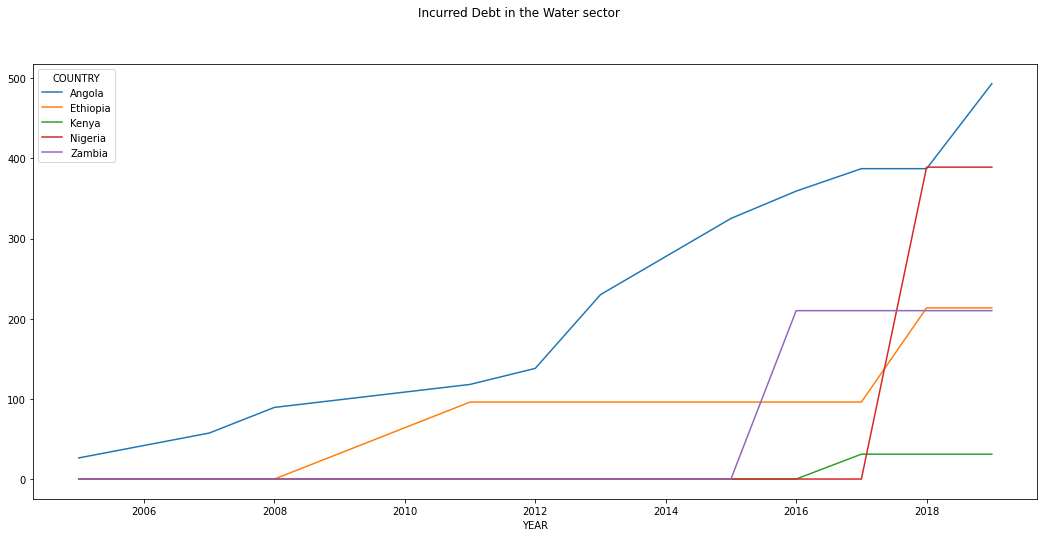

In [ ]:
WaterLoans = WaterLoans[['COUNTRY','Loan Amount in USD (M)', 'YEAR']]
WaterLoans = WaterLoans.pivot_table(index='YEAR', columns='COUNTRY', values = 'Loan Amount in USD (M)')
WaterLoans = WaterLoans.fillna(0).cumsum()
WaterLoans.plot(figsize=(18,8))
plt.suptitle("Incurred Debt in the Water sector")
plt.show()

### Analysis Of Impact Of These Loans

Let's compare the impact of these loans on the development metrics for Angola. We're going to be using specific sector loans to compare the impact in that particular sector. The first one is Agricultural Loans over the past 20 years, these amount to a total of $5 billion. The metrics that show the impact of loans in this sector are Arable land as a % of total land and Employment rate in Agriculture as % of total employment. These metrics best show the impact these loans have had on the Agricultural sector of Angola

<AxesSubplot:xlabel='Employment in agriculture (% of total employment)', ylabel='Loan Amount in USD (M)'>

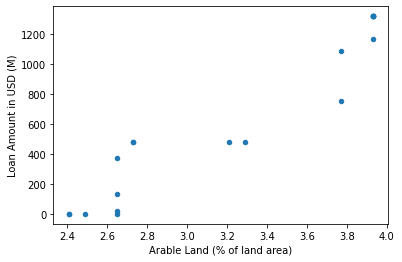

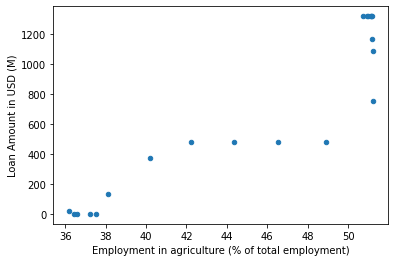

In [ ]:
###Scatter Plot 1: Agriculture Loan (Millions) vs Arable Land (Angola)
###Scatter Plot 2: Agriculture Loan (Millions) vs Employment in Agriculture (Angola)

angola_df = wb.data.DataFrame(['AG.LND.ARBL.ZS', 'SL.AGR.EMPL.ZS'], ['AGO'],
                             time=range(2000, 2020), index=['series', 'economy'])

agricultureLoansScatter = agricultureLoans[agricultureLoans['COUNTRY'] == 'Angola']
agricultureLoansScatter = agricultureLoansScatter[['Loan Amount in USD (M)', 'YEAR']]
agricultureLoansScatter = agricultureLoansScatter.set_index('YEAR')
agricultureLoansScatter = agricultureLoansScatter.reset_index().groupby('YEAR').sum()

#Loans in Agriculture vs Increase in Arable land
angolaArableLand = angola_df.reset_index().transpose()[2:][[0]]
angolaArableLand.index = angolaArableLand.index.map(lambda x: int(x[2:]))
angolaArableLand = angolaArableLand.rename(columns={0: "Arable Land (% of land area)"})

scatter = pd.concat([angolaArableLand[:-1], agricultureLoansScatter], axis=1).fillna(0)
scatter['Loan Amount in USD (M)'] = scatter['Loan Amount in USD (M)'].cumsum()
scatter.plot.scatter(x="Arable Land (% of land area)",y='Loan Amount in USD (M)')

#Loans in Agriculture vs Employment in the Agriculture sector
angolaAgricultureEmployment = angola_df.reset_index().transpose()[2:][[1]]
angolaAgricultureEmployment.index = angolaAgricultureEmployment.index.map(lambda x: int(x[2:]))
angolaAgricultureEmployment = angolaAgricultureEmployment.rename(columns={1: "Employment in agriculture (% of total employment)"})

scatter = pd.concat([angolaAgricultureEmployment, agricultureLoansScatter], axis=1).fillna(0)
scatter['Loan Amount in USD (M)'] = scatter['Loan Amount in USD (M)'].cumsum()
scatter.plot.scatter(x='Employment in agriculture (% of total employment)',y='Loan Amount in USD (M)')

The right side of the scatter plot shows that as the cumulative amount of loans have increased over the past 5 years, the development in those sectors is minimal. Agricultural loans doubled over the past 5 years from $600 million to $1.2 billion and the arable land also increased from 3.2% to 4% of total land, yet the employment in that sector stayed constant. This, combined with little to no improvement in the GDP from the agriculture sector, points to a slowing growth.

Analysis: As the cumulative loan amounts have gone up these metrics have trended in the right direction however we see the 'Law of Diminishing returns' applies here. This is due to the fact that the supporting infrastructure in Angola haven't kept up with the inflow of capital and the benefit of more loans is not directly relating to an improvement in these metrics. Moreover, the tense political conditions have made it increasingly harder for efficient deployment of capital. 

<AxesSubplot:xlabel='Poverty headcount ratio', ylabel='Loan Amount in USD (M)'>

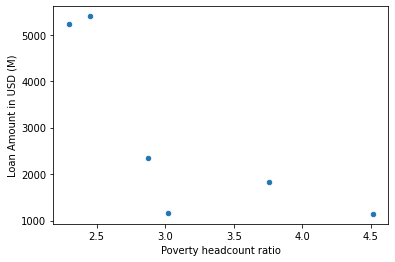

In [ ]:
###Scatter Plot 1: Transportation Loan (Millions) vs Poverty headcount ratio (Angola)

angola_df = wb.data.DataFrame(['TM.VAL.ICTG.ZS.UN'], ['AGO'],
                             time=range(2000, 2020), index=['series', 'economy'])


transportLoansScatter = transportLoans[transportLoans['COUNTRY'] == 'Angola']
transportLoansScatter = transportLoansScatter[['Loan Amount in USD (M)', 'YEAR']]
transportLoansScatter = transportLoansScatter.set_index('YEAR')
transportLoansScatter = transportLoansScatter.reset_index().groupby('YEAR').sum()

#Loans in Transportation vs Poverty headcount ratio
angolaPovertyRatio = angola_df.reset_index().transpose()[2:][[0]]
angolaPovertyRatio.index = angolaPovertyRatio.index.map(lambda x: int(x[2:]))
angolaPovertyRatio = angolaPovertyRatio.rename(columns={0: "Poverty headcount ratio"})

scatter = pd.concat([angolaPovertyRatio, transportLoansScatter], axis=1).dropna()
scatter['Loan Amount in USD (M)'] = scatter['Loan Amount in USD (M)'].cumsum()
scatter.plot.scatter(x='Poverty headcount ratio',y='Loan Amount in USD (M)')

As transportation loans have gone up the poverty headcount ratio has declined but this too is showing signs of slowing down. The last loan in the transport sector has had little to no impact on the poverty headcount ratio of Angola. There is not enough data to prove this hypothesis but after looking at similar data from other sectors we are not optimistic about this rate of decline of poverty with increasing loans.

## <u>Model Evaluaton/Feature Selection</u>

In [ ]:
#['AGO', 'ETH', 'ZMB', 'KEN', 'NGA']
#EP.PMP.DESL.CD	Pump price for diesel fuel (US$ per liter)
#EP.PMP.SGAS.CD	Pump price for gasoline (US$ per liter)
# LP.LPI.OVRL.XQ	Logistics performance index: Overall (1=low to 5=high)
# IS.SHP.GCNW.XQ	Liner shipping connectivity index (maximum value in 2004 = 100)
#SE.PRM.CMPT	Completers, primary, total
#SE.PRM.GINT.ZS	Gross intake ratio in first grade of primary education, total (% of relevant age group)
#SE.PSA.LITR	PISA mean score for reading, total
#SE.PSA.MATH	PISA mean score for math, total
#SE.SCH.LIFE	Expected years of schooling
#SE.TER.CMPL.ZS	Gross graduation ratio, tertiary, total (%)
#SL.UEM.ADVN.ZS	Unemployment with advanced education (% of total labor force with advanced education)
#SL.UEM.BASC.ZS	Unemployment with basic education (% of total labor force with basic education)
#SL.UEM.NEET.ZS	Share of youth not in education, employment or training, total (% of youth population)
#SL.UEM.LTRM.ZS	Long-term unemployment (% of total unemployment)
#SE.XPD.TOTL.GD.ZS	Government expenditure on education, total (% of GDP)
#SH.XPD.CHEX.GD.ZS	Current health expenditure (% of GDP)
#SH.XPD.CHEX.PC.CD	Current health expenditure per capita (current US$)
#SH.XPD.PVTD.CH.ZS	Domestic private health expenditure (% of current health expenditure
#EG.IMP.CONS.ZS	Energy imports, net (% of energy use)
#AG.LND.ARBL.ZS	Arable land (% of land area)
# EG.CFT.ACCS.ZS	Access to clean fuels and technologies for cooking (% of population)
#EN.ATM.PM25.MC.M3	PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)
#EN.ATM.PM25.MC.ZS	PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)
#ER.H2O.FWTL.ZS	Annual freshwater withdrawals, total (% of internal resources)#
#ER.H2O.INTR.PC	Renewable internal freshwater resources per capita (cubic meters)
#SH.XPD.EHEX.PP.CD	External health expenditure per capita, PPP (current international $)
#SI.POV.MDIM	Multidimensional poverty headcount ratio (% of total population)
#SP.DYN.IMRT.MA.IN	Mortality rate, infant, male (per 1,000 live births)
#SP.DYN.LE00.IN	Life expectancy at birth, total (years)
#SP.DYN.TFRT.IN	Fertility rate, total (births per woman)
#TM.VAL.ICTG.ZS.UN 	ICT goods imports (% total goods imports)
#NY.GDP.MKTP.PP.CD	GDP, PPP (current international $)
combined1train = wb.data.DataFrame(['EP.PMP.DESL.CD', 'EP.PMP.SGAS.CD',  'IS.SHP.GCNW.XQ', 
            'LP.LPI.OVRL.XQ',  'SL.UEM.NEET.ZS', 'SE.XPD.TOTL.GD.ZS', 'SH.XPD.CHEX.GD.ZS'
            , 'SH.XPD.CHEX.PC.CD', 'SH.XPD.PVTD.CH.ZS', 'EG.IMP.CONS.ZS', 'AG.LND.ARBL.ZS',
            'EG.CFT.ACCS.ZS', 'EN.ATM.PM25.MC.M3', 'EN.ATM.PM25.MC.ZS', 'ER.H2O.FWTL.ZS'
            , 'ER.H2O.INTR.PC', 'SH.XPD.EHEX.PP.CD', 'SH.XPD.EXTR.ZS', 'SI.POV.MDIM', 'SP.DYN.IMRT.MA.IN',
            'SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'TM.VAL.ICTG.ZS.UN'], ['AGO'],
                             time=range(2000, 2020), index=['series', 'economy'])
combined1Xtrain = combined1train.reset_index().transpose()[2:].fillna(0)
combined1train

,,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
series,economy,,,,,,,,,,,,,,,,,,,,
AG.LND.ARBL.ZS,AGO,2.406353,2.406353,2.486565,2.646988,2.646988,2.646988,2.646988,2.727200,2.727200,3.208470,3.288682,3.769953,3.769953,3.930376,3.930376,3.930376,3.930376,3.930376,3.930376,NaN
EG.CFT.ACCS.ZS,AGO,37.270000,37.960000,38.490000,39.240000,39.940000,40.750000,41.390000,41.910000,42.580000,43.320000,44.100000,44.800000,45.360000,46.150000,46.670000,47.360000,48.050000,NaN,NaN,NaN
EG.IMP.CONS.ZS,AGO,-504.159002,-475.111255,-550.714185,-501.436656,-555.809535,-735.864295,-759.628789,-858.188815,-885.245941,-764.549421,-703.772381,-619.053895,-589.506131,-594.546143,-540.997471,NaN,NaN,NaN,NaN,NaN
EN.ATM.PM25.MC.M3,AGO,36.182968,NaN,NaN,NaN,NaN,34.962912,NaN,NaN,NaN,NaN,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505,NaN,NaN
EN.ATM.PM25.MC.ZS,AGO,100.000000,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
EP.PMP.DESL.CD,AGO,0.150000,NaN,0.130000,NaN,0.290000,NaN,0.360000,NaN,0.390000,NaN,0.430000,NaN,0.420000,NaN,0.510000,NaN,0.820000,NaN,NaN,NaN
EP.PMP.SGAS.CD,AGO,0.300000,NaN,0.190000,NaN,0.390000,NaN,0.500000,NaN,0.530000,NaN,0.650000,NaN,0.630000,NaN,0.760000,NaN,0.970000,NaN,NaN,NaN
ER.H2O.FWTL.ZS,AGO,NaN,NaN,0.450351,NaN,NaN,NaN,NaN,0.476824,NaN,NaN,NaN,NaN,0.476824,NaN,NaN,NaN,NaN,0.476824,NaN,NaN
ER.H2O.INTR.PC,AGO,NaN,NaN,8447.769212,NaN,NaN,NaN,NaN,7079.524103,NaN,NaN,NaN,NaN,5894.553214,NaN,NaN,NaN,NaN,4963.649817,NaN,NaN


Input Variables
- AG.LND.ARBL.ZS: Arable Land
- EG.CFT.ACCS.ZS: Access to clean foods and technology for cooking
- EG.IMP.CONS.ZS: Energy imports, net (% of energy use) 
- EN.ATM.PM25.MC.M3: PM2.5 air pollution (mean annual exposure)
- EN.ATM.PM25.MC.ZS: PM2.5 air pollution (populations exposed to exceed WHO levels) 
- EP.PMP.DESL.CD: Pump price for Diesel Fuel
- EP.PMP.SGAS.CDL Pump price for Gasoline
- ER.H2O.FWTL.ZS: Annual freshwater withdrawals
- ER.H2O.INTR.PC: Renewable internal freshwater resources per capita
- IS.SHP.GCNW.XQ: Liner shipping connectivity index
- LP.LPI.OVRL.XQ: Logistics performance index
- SE.XPD.TOTL.GD.ZS: Government expenditure on education
- SH.XPD.CHEX.GD.ZS: Current health expenditure
- SH.XPD.CHEX.PC.CD: Current health expenditure per capita
- SH.XPD.EHEX.PP.CD: External health expenditure per capitaS
- SH.XPD.PVTD.CH.ZS: Domestic private health expenditure
- SI.POV.MDIM: Multidimensional poverty headcount ratio
- SL.UEM.NEET.ZS: Share of youth not in education 
- SP.DYN.IMRT.MA.IN: Mortality rate, infant, male
- SP.DYN.LE00.IN: Life expectancy at birth, total
- SP.DYN.TFRT.IN: Fertility rate, total
- TM.VAL.ICTG.ZS.UN: ICT good imports 

Output Variables
- NY.GDP.MKTP.PP.CD: GDP




In [ ]:
combined1test = wb.data.DataFrame(['EP.PMP.DESL.CD', 'EP.PMP.SGAS.CD',  'IS.SHP.GCNW.XQ', 
            'LP.LPI.OVRL.XQ',  'SL.UEM.NEET.ZS', 'SE.XPD.TOTL.GD.ZS', 'SH.XPD.CHEX.GD.ZS'
            , 'SH.XPD.CHEX.PC.CD', 'SH.XPD.PVTD.CH.ZS', 'EG.IMP.CONS.ZS', 'AG.LND.ARBL.ZS',
            'EG.CFT.ACCS.ZS', 'EN.ATM.PM25.MC.M3', 'EN.ATM.PM25.MC.ZS', 'ER.H2O.FWTL.ZS'
            , 'ER.H2O.INTR.PC', 'SH.XPD.EHEX.PP.CD', 'SH.XPD.EXTR.ZS', 'SI.POV.MDIM', 'SP.DYN.IMRT.MA.IN',
            'SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'TM.VAL.ICTG.ZS.UN'], ['ETH'],
                             time=range(2000, 2020), index=['series', 'economy'])
combined1Xtest = combined1test.reset_index().transpose()[2:].fillna(0)

In [ ]:
combined1Ytrain = wb.data.DataFrame(['NY.GDP.MKTP.PP.CD'], ['AGO'],
                             time=range(2000, 2020), index=['series', 'economy'])
combined1Ytrain = combined1Ytrain.reset_index().transpose()[2:].fillna(0)

In [ ]:
combined1Ytrain

,0
YR2000,5.393144e+10
YR2001,5.743249e+10
YR2002,6.631363e+10
YR2003,6.956464e+10
YR2004,7.926191e+10
YR2005,9.401414e+10
YR2006,1.080442e+11
YR2007,1.264902e+11
YR2008,1.433494e+11
YR2009,1.456826e+11


In [ ]:
combined1Ytest = wb.data.DataFrame(['NY.GDP.MKTP.PP.CD'], ['ETH'],
                             time=range(2000, 2020), index=['series', 'economy'])
combined1Ytest = combined1Ytest.reset_index().transpose()[2:].fillna(0)

### Model Breakdown

- Train Data: Angola
- Test Data: Ethiopia
- Model: Ridge Regression
- Performance Indicators: R2 Score/Ridge Regression Model Coefficients


In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=0.4).fit(combined1Xtrain, combined1Ytrain)

In [ ]:
y_pred = []
for x in clf.predict(combined1Xtest):
    for y in x:
        y_pred.append(y)

In [ ]:
y_true = list(combined1Ytest[0])


In [ ]:
from sklearn.metrics import r2_score
print('Test R2 Score:', r2_score(y_true, y_pred))

Test R2 Score: 0.8727440521683966


In [ ]:
y_pred_1 = []
for x in clf.predict(combined1Xtrain):
    for y in x:
        y_pred_1.append(y)

y_true_1 = list(combined1Ytrain[0])
print('Train R2 Score:', r2_score(y_true_1, y_pred_1))

Train R2 Score: 0.9976660130778238


In [ ]:
influence_params = []
for x in clf.coef_:
    for y in x:
        influence_params.append(abs(y))


In [ ]:
combined1Xtest

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
YR2000,10.000000,1.07,3.427085,35.533967,100.0,0.27,0.46,0.000000,0.000000,0,...,4.365047,5.384495,3.505848,42.516750,0,0.00,96.8,51.941,6.543,4.885198
YR2001,9.908400,1.18,4.132048,0.000000,0.0,0.00,0.00,0.000000,0.000000,0,...,4.723167,5.616925,4.285963,40.257950,0,0.00,93.2,52.595,6.407,4.193842
YR2002,9.853000,1.31,4.186233,0.000000,0.0,0.32,0.52,4.555738,1739.326558,0,...,4.712630,5.259285,3.187644,43.137707,0,0.00,89.6,53.349,6.262,5.375611
YR2003,10.928000,1.46,4.398830,0.000000,0.0,0.00,0.00,0.000000,0.000000,0,...,4.899709,5.841339,3.587811,39.345722,0,0.00,85.7,54.211,6.112,6.196054
YR2004,10.948721,1.58,4.474108,0.000000,0.0,0.42,0.60,0.000000,0.000000,0,...,4.312819,5.880651,7.485903,39.626690,0,0.00,81.8,55.174,5.961,8.918983
YR2005,11.354643,1.79,4.093588,34.351008,100.0,0.00,0.00,0.000000,0.000000,0,...,4.100981,6.653603,5.984203,35.619068,0,0.00,78.0,56.223,5.812,7.018027
YR2006,11.862065,1.96,4.247062,0.000000,0.0,0.62,0.93,0.000000,0.000000,0,...,4.457573,8.661794,10.506908,42.515202,0,0.00,74.3,57.334,5.667,4.156705
YR2007,12.430849,2.10,4.608148,0.000000,0.0,0.00,0.00,6.844255,1512.252786,0,...,5.001284,11.982315,13.526335,39.997250,0,0.00,70.8,58.467,5.526,6.217259
YR2008,12.048470,2.36,4.843753,0.000000,0.0,0.89,0.92,0.000000,0.000000,0,...,4.280639,13.451802,17.835255,41.225395,0,0.00,67.5,59.581,5.390,6.913712
YR2009,12.351331,2.51,4.790249,0.000000,0.0,0.00,0.00,0.000000,0.000000,0,...,4.649834,15.638039,14.831237,46.902935,0,0.00,64.3,60.645,5.260,7.577721


In [ ]:
combined1trainfinal = wb.data.DataFrame(['EP.PMP.DESL.CD', 'EP.PMP.SGAS.CD',  'IS.SHP.GCNW.XQ', 
            'LP.LPI.OVRL.XQ',  'SL.UEM.NEET.ZS', 'SE.XPD.TOTL.GD.ZS', 'SH.XPD.CHEX.GD.ZS'
            , 'SH.XPD.CHEX.PC.CD', 'SH.XPD.PVTD.CH.ZS', 'EG.IMP.CONS.ZS', 'AG.LND.ARBL.ZS',
            'EG.CFT.ACCS.ZS', 'EN.ATM.PM25.MC.M3', 'EN.ATM.PM25.MC.ZS', 'ER.H2O.FWTL.ZS'
            , 'ER.H2O.INTR.PC', 'SH.XPD.EHEX.PP.CD', 'SH.XPD.EXTR.ZS', 'SI.POV.MDIM', 'SP.DYN.IMRT.MA.IN',
            'SP.DYN.LE00.IN', 'SP.DYN.TFRT.IN', 'TM.VAL.ICTG.ZS.UN'], ['AGO'],
                             time=range(2000, 2020), index=['series', 'economy'])

In [ ]:
features = list(combined1trainfinal.reset_index()['series'])

In [ ]:
d = {'features': features, 'absolute of coeffs': influence_params}

In [ ]:
df = pd.DataFrame(data=d)

In [ ]:
df.sort_values(by='absolute of coeffs', ascending=False).head(5)

,features,absolute of coeffs
0,AG.LND.ARBL.ZS,8.620750e+09
10,LP.LPI.OVRL.XQ,6.443994e+09
19,SP.DYN.LE00.IN,5.712609e+09
6,EP.PMP.SGAS.CD,5.106029e+09
21,TM.VAL.ICTG.ZS.UN,4.427885e+09


### <u>Model Conclusion</u>
### The top 3 features that have the most influence on the Ridge Regression model in predicting GDP are the following: AG.LND.ARBL.ZS, LP.LPI.OVRL.XQ, and SP.DYN.LE00.IN. These are Arable land (% of land area), Logistics performance index, and Life Expectancy. Here are following model evaluation scores below:

### Train R2 score: 0.9977 
### Test R2 score is 0.8272

### Our model does not overfit, which is great news and has performed to its best ability!

### <u>Key Takeaways</u>
### It's important to understand what Logistics performance index and Arable land are. According to the World bank, "LPI is an interactive benchmarking tool created to help countries identify the challenges and opportunities they face in their performance on trade logistics and what they can do to improve their performance." Arable land is land that is used for harvesting crops. This is especially important for countries like Angola and Ethiopia since trade and land acquisition are integral to economic growth! Life expectancy is also key as well.

### <u>References</u>
#### https://lpi.worldbank.org/
#### https://databank.worldbank.org/metadataglossary/world-development-indicators/series/AG.LND.AGRI.K2
#### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
#### https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=828abbb6-8245-4bc1-8af9-0c947a6a01b6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>